In [59]:
NAMES = ["Andrew Fidler",
         "Ryan Da Silva",
         "Mike Suderman",
         "Pavel Demin",
         "Saewan Koh",
         ]
GROUP = "4"

In [60]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

import statsmodels.api as sm

In [61]:
# read data
on_df = pd.read_csv('1410037601_databaseLoadingData.csv')

# drop redundant columns
on_df = on_df[[
    'REF_DATE',
    'Class of worker',
    'North American Industry Classification System (NAICS)',
    'VALUE',
    'STATUS'
]]
# convert date column
on_df.REF_DATE = on_df.REF_DATE.astype('datetime64')

print(on_df.head())

    REF_DATE                         Class of worker  \
0 2011-10-01  Total employed, all classes of workers   
1 2011-11-01  Total employed, all classes of workers   
2 2011-12-01  Total employed, all classes of workers   
3 2012-01-01  Total employed, all classes of workers   
4 2012-02-01  Total employed, all classes of workers   

  North American Industry Classification System (NAICS)   VALUE STATUS  
0                     Total employed, all industries     6659.9    NaN  
1                     Total employed, all industries     6678.5    NaN  
2                     Total employed, all industries     6649.4    NaN  
3                     Total employed, all industries     6550.1    NaN  
4                     Total employed, all industries     6545.7    NaN  


In [62]:
# pivot table to show collected values
DF_PIVOT = on_df.pivot(index=["REF_DATE"], 
            columns=["Class of worker", "North American Industry Classification System (NAICS)"],
            values="VALUE")

In [63]:
# selecting only service industry
services = DF_PIVOT['Total employed, all classes of workers'].iloc[:, 7:]
services.head()

North American Industry Classification System (NAICS),Services-producing sector,"Wholesale and retail trade [41, 44-45]",Transportation and warehousing [48-49],"Finance, insurance, real estate, rental and leasing [52-53]","Professional, scientific and technical services [54]","Business, building and other support services [55-56]",Educational services [61],Health care and social assistance [62],"Information, culture and recreation [51, 71]",Accommodation and food services [72],Other services (except public administration) [81],Public administration [91]
REF_DATE,,,,,,,,,,,,
2011-10-01,5231.4,1002.1,322.5,490.0,546.0,303.4,464.4,748.6,305.9,402.0,280.1,366.4
2011-11-01,5259.1,1019.7,318.9,491.0,547.7,298.7,482.4,756.7,302.9,389.1,287.2,364.8
2011-12-01,5260.9,1014.5,320.3,485.6,548.4,291.7,485.7,761.5,307.1,399.2,284.8,362.0
2012-01-01,5185.3,986.4,314.4,489.6,550.0,279.3,479.7,756.6,293.3,388.5,290.8,356.8
2012-02-01,5184.9,978.3,304.9,498.5,546.8,285.2,484.9,753.2,299.0,387.4,285.9,360.7


In [64]:
# replacing values with % change from last period and droping 1st row with NA data
services_percentage = services.apply(lambda x: x / (x.shift(1)) * 100 - 100)
services_percentage = services_percentage.tail(-1)
services_percentage.head()

North American Industry Classification System (NAICS),Services-producing sector,"Wholesale and retail trade [41, 44-45]",Transportation and warehousing [48-49],"Finance, insurance, real estate, rental and leasing [52-53]","Professional, scientific and technical services [54]","Business, building and other support services [55-56]",Educational services [61],Health care and social assistance [62],"Information, culture and recreation [51, 71]",Accommodation and food services [72],Other services (except public administration) [81],Public administration [91]
REF_DATE,,,,,,,,,,,,
2011-11-01,0.529495,1.756312,-1.116279,0.204082,0.311355,-1.549110,3.875969,1.082020,-0.980713,-3.208955,2.534809,-0.436681
2011-12-01,0.034226,-0.509954,0.439009,-1.099796,0.127807,-2.343488,0.684080,0.634333,1.386596,2.595734,-0.835655,-0.767544
2012-01-01,-1.437016,-2.769837,-1.842023,0.823723,0.291758,-4.250943,-1.235330,-0.643467,-4.493650,-2.680361,2.106742,-1.436464
2012-02-01,-0.007714,-0.821168,-3.021628,1.817810,-0.581818,2.112424,1.084011,-0.449379,1.943403,-0.283140,-1.685007,1.093049
2012-03-01,0.472526,1.308392,-1.311906,-0.882648,0.932699,-1.016830,-2.412869,1.168348,3.478261,3.846154,-0.384750,-0.942612


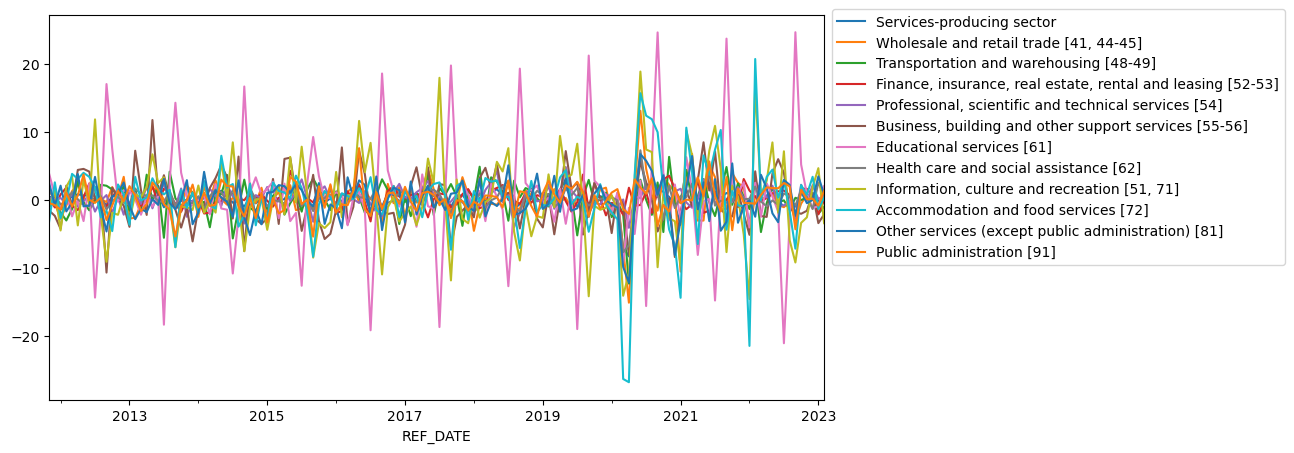

In [65]:
# inspecting change over time, noticing significant flactuation in certain sub-industries, and post pamdemic period already 
# stands out
services_percentage.plot(kind='line',figsize=(10,5))
plt.legend(loc=(1.01,.35))

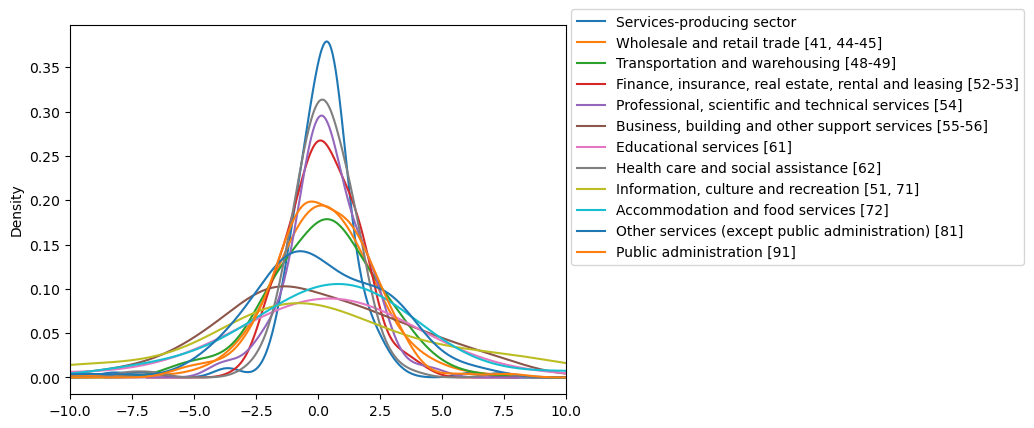

In [66]:
# inspecting the curve, observing moderate skewness, but kurtosis definately varies significantly 
services_percentage.plot.kde()
ax = plt.gca()
ax.set_xlim([-10, 10])
plt.legend(loc=(1.01,.35))

In [67]:
# just confirming that skewness of data is modest
services_percentage['Services-producing sector'].skew()

-1.7439099674618124

In [68]:
# kurtosis, as expected is out of bound, data probably have significant outliers
services_percentage['Services-producing sector'].kurtosis()

12.151853642423895

In [69]:
# making columns for month and year for further inspection
services_percentage["Month"] = services_percentage.index.month
services_percentage["Year"] = services_percentage.index.year

In [70]:
# inspecting data by year, 2020 and 2021 again stand out, 2020 has the only negative rate of growth for entire sector,
# 2021 seems to have higher mean than the rest of data
services_percentage.groupby(['Year'])["Services-producing sector"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,2.0,0.281861,0.350208,0.034226,0.158044,0.281861,0.405678,0.529495
2012,12.0,0.174192,0.694815,-1.437016,-0.133411,0.503775,0.651760,0.852305
2013,12.0,0.045222,0.884780,-1.106042,-0.611499,-0.084004,0.567680,1.885344
2014,12.0,0.099294,0.745427,-1.002237,-0.472211,0.087368,0.543683,1.356890
2015,12.0,0.032109,0.869299,-1.341055,-0.529826,0.138502,0.633381,1.656322
2016,12.0,0.125278,1.014236,-1.829431,-0.320882,0.120519,0.674790,2.059898
2017,12.0,0.235626,0.787952,-1.011477,-0.282369,0.223204,0.553977,2.133611
2018,12.0,0.193052,0.906404,-1.389010,-0.225071,0.417869,0.725259,1.583104
2019,12.0,0.269970,0.793218,-0.968925,-0.434186,0.309640,0.640313,1.855303


In [71]:
# inspecting just 2020 sorted by month, some months already stand out, march and april plummeted, and than june skyrocketed 
# compared to the rest of the months in 2020
services_percentage[services_percentage['Year'] == 2020].groupby(['Month']).head()

North American Industry Classification System (NAICS),Services-producing sector,"Wholesale and retail trade [41, 44-45]",Transportation and warehousing [48-49],"Finance, insurance, real estate, rental and leasing [52-53]","Professional, scientific and technical services [54]","Business, building and other support services [55-56]",Educational services [61],Health care and social assistance [62],"Information, culture and recreation [51, 71]",Accommodation and food services [72],Other services (except public administration) [81],Public administration [91],Month,Year
REF_DATE,,,,,,,,,,,,,,
2020-01-01,-0.975537,-1.929794,-2.531328,-0.427843,0.435540,-4.877271,-2.022352,0.432229,0.722146,-1.837672,-0.614754,1.088977,1,2020
2020-02-01,-0.175621,0.792449,-0.231422,-0.760205,-1.185314,1.005362,1.122578,-0.066211,-1.536361,-2.852686,-1.134021,1.602733,2,2020
2020-03-01,-6.981888,-7.279152,-2.113402,-2.181515,0.073142,-0.763106,-9.364369,-7.696555,-14.112344,-26.382198,-9.871394,-1.344712,3,2020
2020-04-01,-8.316521,-15.139101,-12.322275,1.804562,-4.107587,-8.124373,-1.165547,-6.675440,-10.779168,-26.861951,-12.186656,-2.044561,4,2020
2020-05-01,0.080552,1.616706,-1.621622,-0.836120,0.533537,-0.873362,-5.016990,-0.153826,2.805430,3.706860,-0.439174,3.023816,5,2020
2020-06-01,6.197487,13.147718,2.991453,-0.741990,0.288097,5.653451,2.840909,7.318013,18.926056,15.735415,6.749007,1.844156,6,2020
2020-07-01,1.597131,4.599160,0.029638,1.172273,2.343514,2.640723,-15.633313,1.507357,7.438934,12.424565,5.785124,0.918133,7,2020
2020-08-01,2.399884,0.700149,-2.192593,-1.897565,2.097799,-0.067705,5.675479,2.840306,7.061660,11.904010,4.296875,3.184230,8,2020
2020-09-01,1.689765,-1.575971,2.574977,1.300924,0.434091,-4.640921,24.695892,0.928260,-9.909910,9.988713,0.786517,-3.845212,9,2020


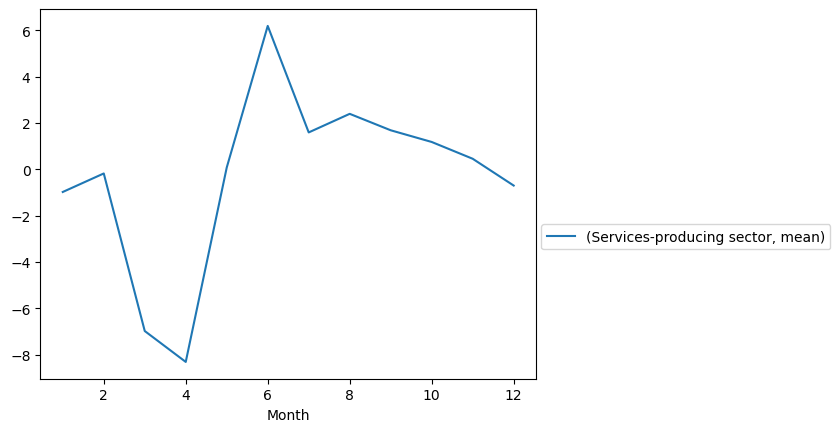

In [97]:
# inspecting scatterplot, same observation, march, april, june stand out
services_percentage[services_percentage['Year'] == 2020].groupby("Month").agg({'Services-producing sector': ['mean']}).plot()
plt.legend(loc=(1.01,.35))

<AxesSubplot:xlabel='Month', ylabel='Services-producing sector'>

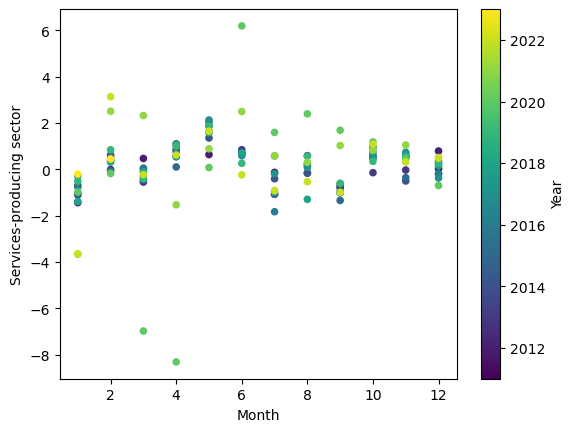

In [72]:
# inspecting scatterplot, noticing 3 visible outliers, again march, april, june of 2020
services_percentage.plot.scatter("Month", "Services-producing sector", c="Year", colormap='viridis')

In [73]:
# droping 4 months (march to june) as significant outliers due to extraordinary event (reffering to pandemic) 
services_percentage_exl_2020 = services_percentage.drop(['2020-03-01'])
services_percentage_exl_2020 = services_percentage_exl_2020.drop(['2020-04-01'])
services_percentage_exl_2020 = services_percentage_exl_2020.drop(['2020-05-01'])
services_percentage_exl_2020 = services_percentage_exl_2020.drop(['2020-06-01'])

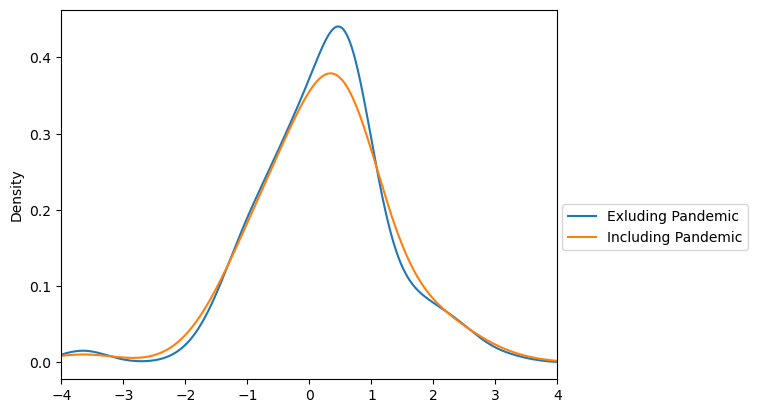

In [74]:
# inspecting new and old distribution, noticing the change
services_percentage_exl_2020['Services-producing sector'].plot.kde(label = "Exluding Pandemic")
services_percentage['Services-producing sector'].plot.kde(label = "Including Pandemic")
ax = plt.gca()
ax.set_xlim([-4, 4])
plt.legend(loc=(1.01,.35))

In [75]:
# just confirming the new skewness of data, noticable improvement
services_percentage_exl_2020['Services-producing sector'].skew()

-0.41165215540058714

In [76]:
# just confirming the new kurtosis of data, noticable improvement
services_percentage_exl_2020['Services-producing sector'].kurtosis()

2.1939964340239073

In [77]:
# inspecting data by year, 2020 already looks better than before, but now 2020 and 2021 seem to have higher mean of growth
# which probably can be attributted to post pandemic recovery
services_percentage_exl_2020.groupby(['Year'])["Services-producing sector"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,2.0,0.281861,0.350208,0.034226,0.158044,0.281861,0.405678,0.529495
2012,12.0,0.174192,0.694815,-1.437016,-0.133411,0.503775,0.651760,0.852305
2013,12.0,0.045222,0.884780,-1.106042,-0.611499,-0.084004,0.567680,1.885344
2014,12.0,0.099294,0.745427,-1.002237,-0.472211,0.087368,0.543683,1.356890
2015,12.0,0.032109,0.869299,-1.341055,-0.529826,0.138502,0.633381,1.656322
2016,12.0,0.125278,1.014236,-1.829431,-0.320882,0.120519,0.674790,2.059898
2017,12.0,0.235626,0.787952,-1.011477,-0.282369,0.223204,0.553977,2.133611
2018,12.0,0.193052,0.906404,-1.389010,-0.225071,0.417869,0.725259,1.583104
2019,12.0,0.269970,0.793218,-0.968925,-0.434186,0.309640,0.640313,1.855303


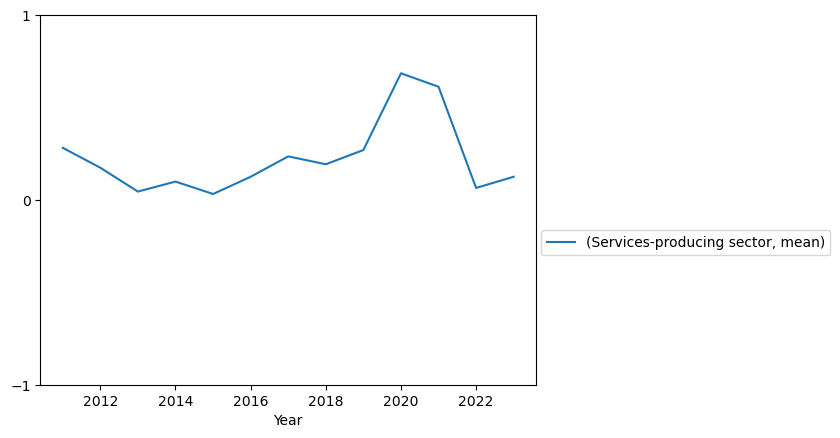

In [118]:
# we can observe on the chart that even after exluding the most significant outliers from 2020, growth rate on average
# is still higher  in 2020 and 2021 than before or after, again it probably can be attributed to post pandemic recovery
services_percentage_exl_2020.groupby("Year").agg({'Services-producing sector': ['mean']}).plot(yticks = [-1, 1, 0])
plt.legend(loc=(1.01,.35))

In [79]:
# there are 2 min wage increases that happened on January 1st: 2018 and 2014
# which means december is probably the month when employers would decide to let go of employees if at all
services_dec = services_percentage_exl_2020[(services_percentage['Month'] == 12)]['Services-producing sector']
services_dec.head(12)

C:\Users\M.J. Rock\AppData\Local\Temp\ipykernel_14832\938924342.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  services_dec = services_percentage_exl_2020[(services_percentage['Month'] == 12)]['Services-producing sector']


REF_DATE
2011-12-01    0.034226
2012-12-01    0.793889
2013-12-01   -0.205233
2014-12-01    0.341799
2015-12-01    0.228657
2016-12-01   -0.175980
2017-12-01   -0.371235
2018-12-01    0.149003
2019-12-01    0.270701
2020-12-01   -0.697894
2021-12-01    0.513452
2022-12-01    0.490811
Name: Services-producing sector, dtype: float64

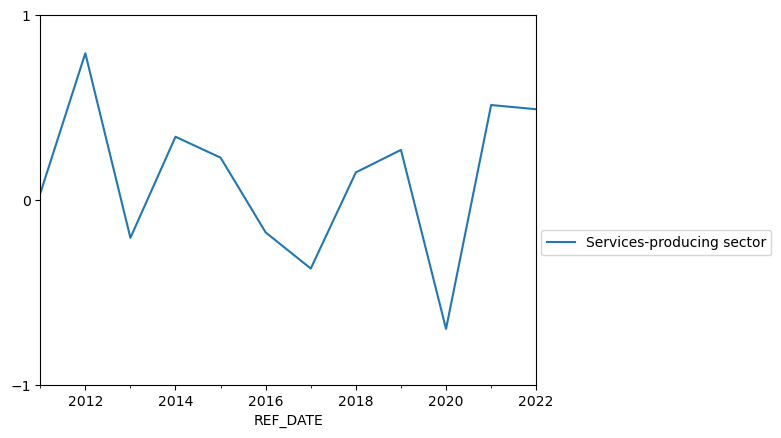

In [117]:
# visual inspection does not show any clear trend in data (NOTE: data only for months of december)
services_dec.plot(yticks = [-1, 1, 0])
plt.legend(loc=(1.01,.35))

In [123]:
# dec 2013 and 2017 values seem to be located well within 2 standard deviations
# note: z score shows how many standard deviations the value is away from the mean
print(round(ss.zscore(services_dec).loc['2017-12-01'], 2), round(ss.zscore(services_dec).loc['2013-12-01'], 2))

-1.21 -0.79


In [81]:
# other min wage increases happened on October 1st: 2015, 2016, 2017, 2020, 2021, 2022
# which means september is probably the month when employers would decide to let go of employees if at all
# 2020 and 2021 stand out, as mentioned before, probably can be attributted to post pandemic recovery

services_sep = services_percentage_exl_2020[(services_percentage['Month'] == 9)]['Services-producing sector']
services_sep.head(12)

C:\Users\M.J. Rock\AppData\Local\Temp\ipykernel_14832\1420971509.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  services_sep = services_percentage_exl_2020[(services_percentage['Month'] == 9)]['Services-producing sector']


REF_DATE
2012-09-01   -0.719533
2013-09-01   -0.800176
2014-09-01   -1.002237
2015-09-01   -1.341055
2016-09-01   -0.970277
2017-09-01   -1.011477
2018-09-01   -0.613804
2019-09-01   -0.598034
2020-09-01    1.689765
2021-09-01    1.028745
2022-09-01   -0.988883
Name: Services-producing sector, dtype: float64

C:\Users\M.J. Rock\AppData\Local\Temp\ipykernel_14832\2269237621.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  services_percentage_exl_2020[(services_percentage['Month'] == 9)].plot.scatter("Month", "Services-producing sector", c="Year", colormap='viridis', yticks = [-2, 2, 0])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


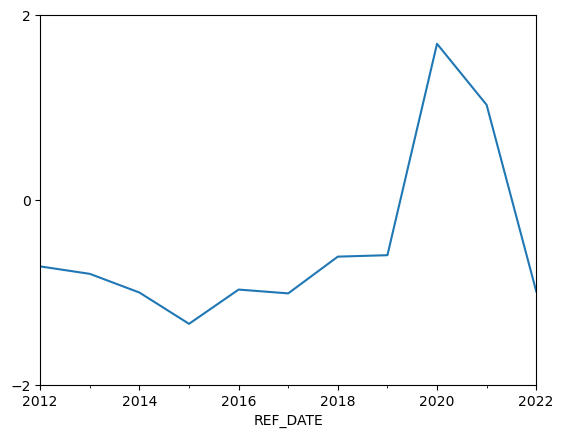

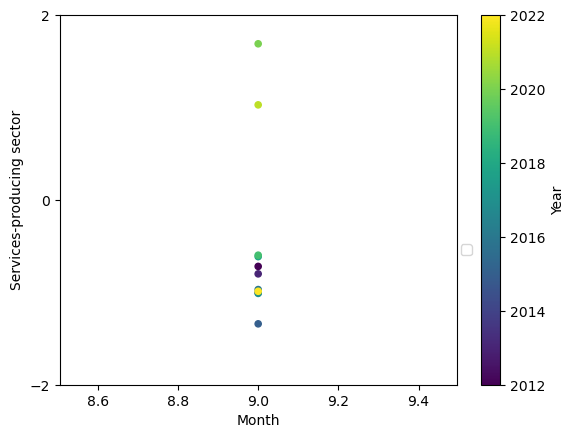

In [130]:
# visual inspection does not shows outliers in data (NOTE: data only for months of september)
services_sep.plot(yticks = [-2, 2, 0])
# inspecting scatterplot for september, noticing 2 visible outliers, again 2020, 2021
services_percentage_exl_2020[(services_percentage['Month'] == 9)].plot.scatter("Month", "Services-producing sector", c="Year", colormap='viridis', yticks = [-2, 2, 0])
plt.legend(loc=(1.01,.35))

C:\Users\M.J. Rock\AppData\Local\Temp\ipykernel_14832\3985790359.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  services_sep_with_wage = services_percentage_exl_2020[(services_percentage['Month'] == 9) & (services_percentage['Year'].isin(years_with_increase))]['Services-producing sector']
C:\Users\M.J. Rock\AppData\Local\Temp\ipykernel_14832\3985790359.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  services_sep_no_wage = services_percentage_exl_2020[(services_percentage['Month'] == 9) & (services_percentage['Year'].isin(years_without_increase))]['Services-producing sector']


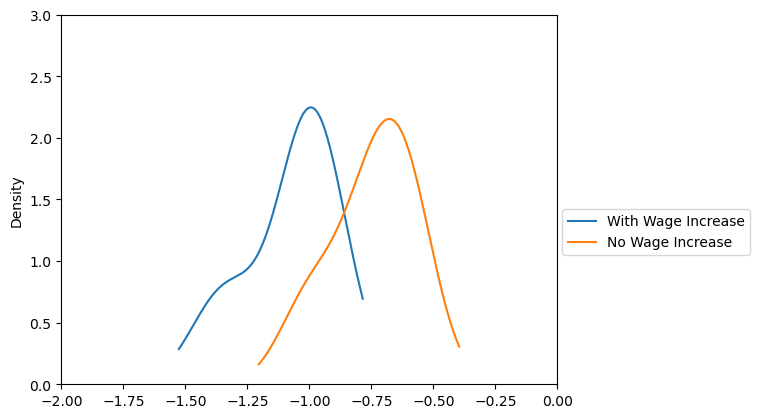

In [87]:
# making lists for years when increase has taken place and when have not, excluding the pandemic (2020,2021)
years_with_increase = [2015, 2016, 2017, 2022]
years_without_increase = [2012, 2013, 2014, 2018, 2019]

# months right before the increase
services_sep_with_wage = services_percentage_exl_2020[(services_percentage['Month'] == 9) & (services_percentage['Year'].isin(years_with_increase))]['Services-producing sector']

# some months but for years without the increase before the pandemic
services_sep_no_wage = services_percentage_exl_2020[(services_percentage['Month'] == 9) & (services_percentage['Year'].isin(years_without_increase))]['Services-producing sector']

# visual inspection of data, septembers without min wage increase seem to be higher on average
services_sep_with_wage.plot.kde()
services_sep_no_wage.plot.kde()
ax = plt.gca()
ax.set_xlim([-2, 0])
ax.set_ylim([0, 3])
plt.legend(['With Wage Increase', 'No Wage Increase'], loc=(1.01,.35))

In [341]:
# looking at numbers, measn for two sets are different different by 0.33
print(round(services_sep_with_wage.mean(), 3), "|", round(services_sep_no_wage.mean(), 3), "|", round(services_sep_with_wage.mean()-services_sep_no_wage.mean(), 3),)

-1.078 | -0.747 | -0.331


In [85]:
# Method 1. T test 
# conducting a T-test for the means of two independent samples of scores
# this is a test for the null hypothesis that 2 independent samples have identical average (expected) values
ss.ttest_ind(services_sep_with_wage, services_sep_no_wage).pvalue

0.02274632544605274

In [86]:
# p value is 0.02 which is lower than alpha value of 0.05 so we reject null hypothesis and conclude that there is effect of 
# minimum wage increase on growth rate of service industry jobs, based on pre pandemic data

In [378]:
# Method 2. permutation test
# the null hypothesis is that the data are randomly sampled from the same distribution

def statistic(x, y):
    return x.mean() - y.mean()

result = ss.permutation_test((services_sep_no_wage, services_sep_with_wage), statistic, n_resamples=10000)
print(result.statistic, "|", result.pvalue)

0.33116645668691835 | 0.047619047619047616


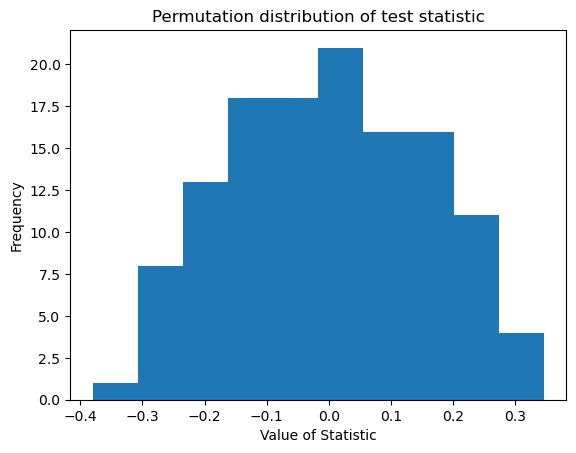

In [379]:
plt.hist(result.null_distribution, bins=10)
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# The probability of obtaining a test statistic less than or equal to the observed value under the null hypothesis is 4.8%.
# This is less than our chosen threshold of 5%, so we consider this to be significant evidence against the null hypothesis in 
# favor of the alternative.